In [162]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [163]:
df = pd.read_csv('C:\\Users\\Ahmed Nabil\\OneDrive\\Desktop\\mymoviedb.csv')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Unnamed: 9,Unnamed: 10
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,NaN,NaN
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,NaN,NaN
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,NaN,NaN
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,NaN,NaN
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,NaN,NaN


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9826 non-null   object 
 4   Vote_Count         9826 non-null   object 
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
 9   Unnamed: 9         12 non-null     object 
 10  Unnamed: 10        2 non-null      object 
dtypes: float64(1), object(10)
memory usage: 844.6+ KB


We need to make tiny cleaning and some type conversions before start visualizing.

In [165]:
df[['Unnamed: 9', 'Unnamed: 10']]

,Unnamed: 9,Unnamed: 10
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
9822,NaN,NaN
9823,NaN,NaN
9824,NaN,NaN
9825,NaN,NaN


In [166]:
df.drop(columns = ['Unnamed: 9', 'Unnamed: 10'], inplace = True)

In [167]:
df.dropna(inplace= True) # removing the single row that has Nan values
df.shape

(9826, 9)

In [168]:
# find the non numeric values in 'Vote_Count' column to remove them
idx = list( df[df['Vote_Count'].apply(lambda x : not x.isdigit())]['Vote_Count'].index )
df.drop(idx, inplace = True)

In [169]:
# Type Conversions
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Popularity'] = df['Popularity'].astype('float')
df['Vote_Count'] = df['Vote_Count'].astype('int')

Visualization

In [187]:
# get movies with highest Popularity
sort_pop = df[['Popularity','Title', 'Genre']].sort_values(by = 'Popularity', ascending = False) 
sort_pop = sort_pop.iloc[0:10]
sort_pop

,Popularity,Title,Genre
0,5083.954,Spider-Man: No Way Home,"Action, Adventure, Science Fiction"
1,3827.658,The Batman,"Crime, Mystery, Thriller"
2,2618.087,No Exit,Thriller
3,2402.201,Encanto,"Animation, Comedy, Family, Fantasy"
4,1895.511,The King's Man,"Action, Adventure, Thriller, War"
5,1750.484,The Commando,"Action, Crime, Thriller"
6,1675.161,Scream,"Horror, Mystery, Thriller"
7,1601.782,Kimi,Thriller
8,1594.013,Fistful of Vengeance,"Action, Crime, Fantasy"
9,1537.406,Eternals,Science Fiction


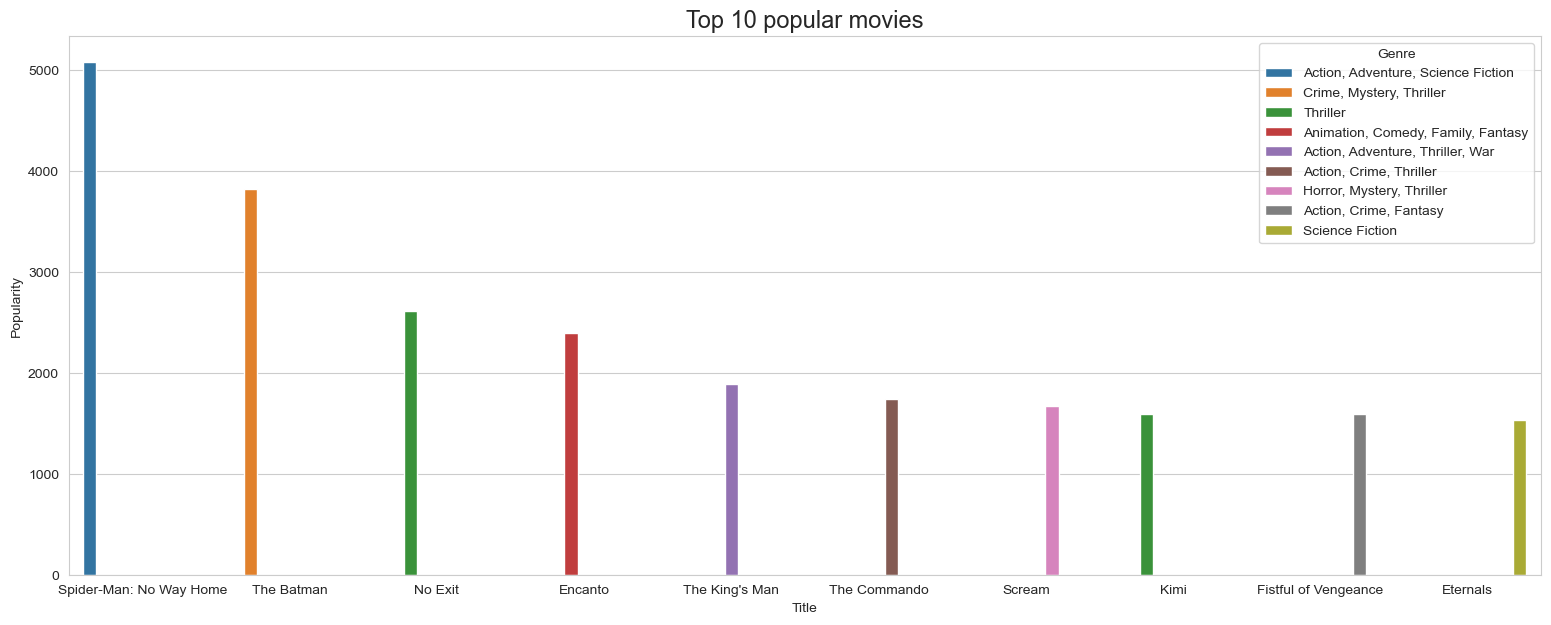

In [188]:
sb.set_style('whitegrid')
plt.figure(figsize = (19, 7))
bars = sb.barplot(x = 'Title', y = 'Popularity', data = sort_pop, hue = 'Genre' )
plt.title("Top 10 popular movies", fontsize = 17)
plt.show()

In [172]:
# # The Genre of the most popular movie
# MPV = sort_pop.iloc[0,1]
# df.loc[df['Title'] == MPV, 'Genre']

So it's clear that 'Spider-Man: No Way Home' is the most popular movie among these 10

In [173]:
# get the years from the 'Release_Date' column and get thei count
years = pd.DataFrame(df['Release_Date'].dt.year.value_counts().sort_values(ascending = False).reset_index())
years.columns = ['Year','Movies Count']

Text(0.5, 1.0, 'The Most Years at Which Movies Produced')

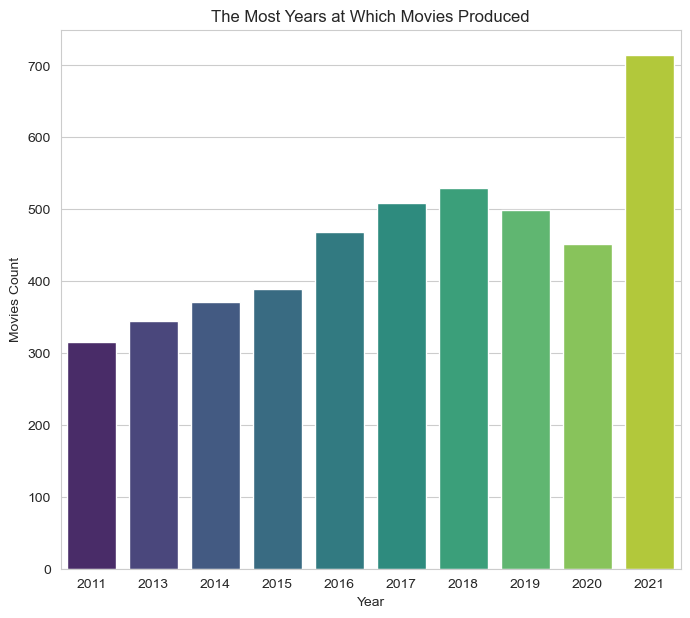

In [174]:
plt.figure(figsize = (8, 7))
sb.barplot(x= 'Year', y = 'Movies Count', data = years.iloc[0:10], palette='viridis')
plt.title("The Most Years at Which Movies Produced")

In [175]:
# Get the most mentioned kinds in genre column
Genre_count = {}
for i in df['Genre'] :
    arr = i.split(",")
    for w in arr :
        Genre_count[w.strip()] = Genre_count.get(w.strip(), 0) + 1


In [176]:
# Convert it to Data Frame and sort them
genres = pd.DataFrame(Genre_count.values(), index = Genre_count.keys()).reset_index()
genres.columns = ['Kind', 'Count']
genres.sort_values(by = 'Count' , ascending= False, inplace= True)


Text(0.5, 1.0, 'The Most Genres of the Movies ')

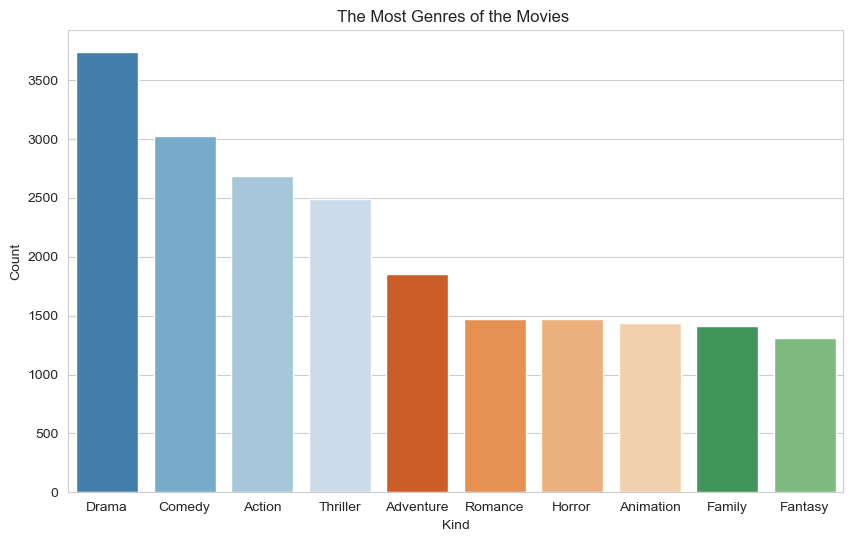

In [177]:
plt.figure(figsize= (10, 6))
sb.barplot(x = 'Kind' , y = 'Count', data = genres.iloc[0:10] , palette='tab20c')
plt.title("The Most Genres of the Movies ")

In [178]:
# get all the movies sorted by their 'Vote_Average'
votes = df.loc[0: , ['Title','Genre', 'Vote_Count','Vote_Average']].sort_values(by = 'Vote_Average', ascending = False)
# drop all movies with vote count < 100 
votes.drop(list(df[df['Vote_Count'] < 100].index), inplace = True)

Text(0, 0.5, 'Average Rate')

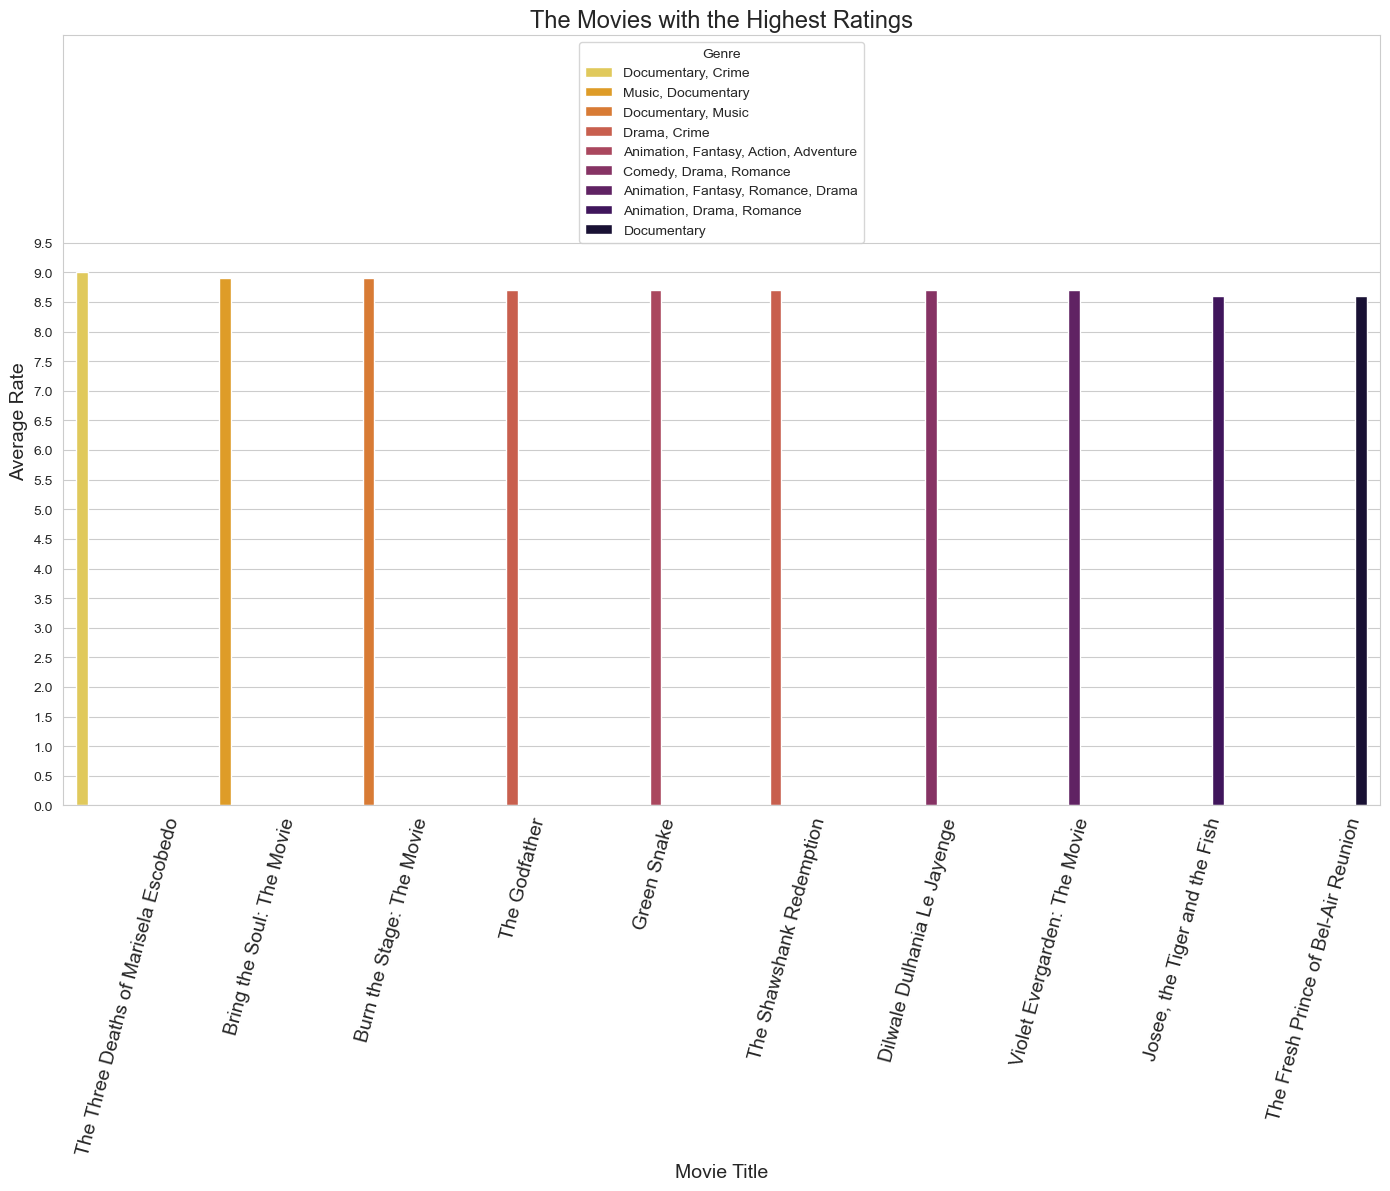

In [183]:
plt.figure(figsize = (17, 10))
plt.xticks(rotation = 75, fontsize = 14) 
plt.yticks(ticks = np.arange(0,10,0.5)) # increment thy y-axis values by 0.5
plt.ylim(0, 13)
plt.title("The Movies with the Highest Ratings", fontsize = 17)
sb.barplot(x = 'Title', y = 'Vote_Average', data = votes.iloc[0:10], hue = 'Genre', palette = 'inferno_r')
plt.xlabel("Movie Title", fontsize = 14)
plt.ylabel("Average Rate", fontsize = 14)

In [216]:
# getting the most and the least popular movie
edges = df[['Title', 'Popularity']].sort_values(by = 'Popularity', ascending = False).reset_index()
edges.drop('index', axis = 1, inplace = True)
edges = edges.loc[(edges.index == 0) | (edges.index == edges.shape[0]-1)] # let onnly the 1st and last rows

Text(0.5, 1.0, 'The 2 Most and Least Popular Movies')

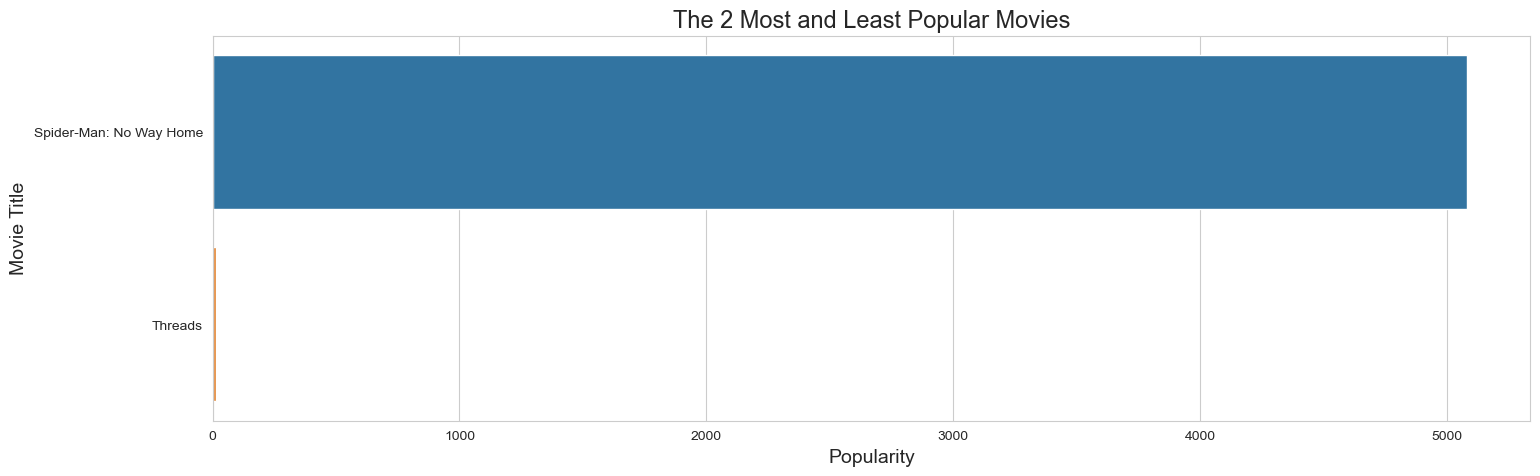

In [224]:
plt.figure(figsize = (17, 5))
sb.barplot(y = 'Title', x ='Popularity', data = edges)
plt.xlabel("Popularity", fontsize = 14)
plt.ylabel("Movie Title", fontsize = 14)
plt.title('The 2 Most and Least Popular Movies', fontsize = 17)